In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
pd.options.mode.chained_assignment = None
%matplotlib inline

In [2]:
from graspologic.datasets import load_mice

# Load the full mouse dataset
mice = load_mice()

# Stack all adjacency matrices in a 3D numpy array
graphs = np.array(mice.graphs)

# Get sample parameters
n_subjects = mice.meta["n_subjects"]
n_vertices = mice.meta["n_vertices"]

# Split the set of graphs by genotype
btbr = graphs[mice.labels == "BTBR"]
b6 = graphs[mice.labels == "B6"]
cast = graphs[mice.labels == "CAST"]
dba2 = graphs[mice.labels == "DBA2"]

connectomes = [btbr, b6, cast, dba2]

In [3]:
# Embed mice graphs
# Single graph embedding
from graspologic.embed import node2vec_embed, AdjacencySpectralEmbed, LaplacianSpectralEmbed
# Multiple graph embedding
from graspologic.embed import OmnibusEmbed, MultipleASE, mug2vec
from graspologic.plot import pairplot

# Jointly embed graphs using omnibus embedding
embedder = OmnibusEmbed()
omni_embedding = embedder.fit_transform(graphs)
print(omni_embedding.shape)

(32, 332, 5)


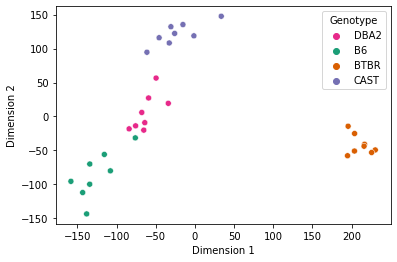

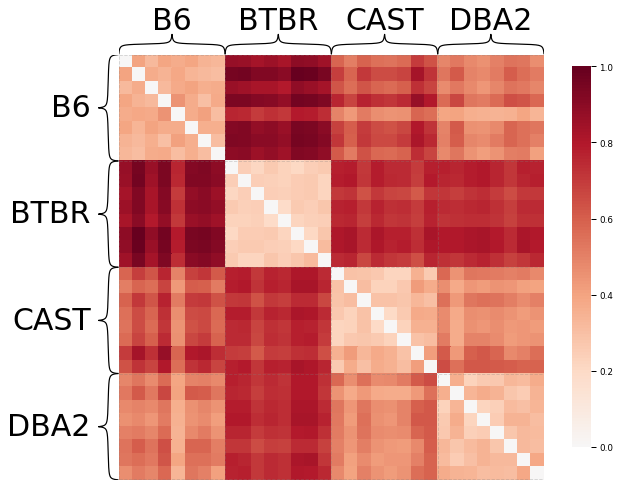

In [4]:
from graspologic.embed import ClassicalMDS
from graspologic.plot import heatmap

# Further reduce embedding dimensionality using cMDS
cmds = ClassicalMDS(2)
cmds_embedding = cmds.fit_transform(omni_embedding)
cmds_embedding = pd.DataFrame(cmds_embedding, columns=["Dimension 1", "Dimension 2"])
cmds_embedding["Genotype"] = mice.labels

# Embedding with BTBR
sns.scatterplot(
    x="Dimension 1",
    y="Dimension 2",
    hue="Genotype",
    data=cmds_embedding,
    palette=["#e7298a", "#1b9e77", "#d95f02", "#7570b3"],
)
plt.show()

# Find the dissimilarity between subjects' connectomes using the cMDS embedding
dis = cmds.dissimilarity_matrix_
scaled_dissimilarity = dis / np.max(dis)

heatmap(scaled_dissimilarity,
        context="paper",
        inner_hier_labels=mice.labels,)
plt.show()